In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt
from pathlib import Path
from PIL import Image
from tqdm.notebook import tqdm

In [2]:
class Analyser:
    def __init__(self, root: str=r'\\aka\share\amed\amed_abdomen'):
        self.root = Path(root)
        directory = [i for d in self.root.iterdir() if d.name!='logs' and d.name!='list' for i in d.iterdir()]
        self.path = [d for d in directory]

    def create_df(self) -> pd.DataFrame:
        data = {'path': [], 'age': [], 'sex': [], 'diagnosis': [], 'height': [], 'width':[], 'area': [], 'roi': [], 'ratio_bbox': []}
        for d in tqdm(self.path):
            age, sex = self._read_data(d)
            width, height = self._load_img(d)
            roi = self._calc_roi(d)
            data['path'].append(d)
            data['age'].append(age)
            data['sex'].append(sex)
            data['diagnosis'].append(d.parent.name)
            data['height'].append(height)
            data['width'].append(width)
            data['area'].append(width * height)
            data['roi'].append(roi)
            data['ratio_bbox'].append(roi / width / height)
        df = pd.DataFrame(data)
        return df

    def _read_data(self, path: str):
        path = Path(path).glob('*_patient.csv')
        with open(*path, 'r', encoding='utf-8') as f:
            d = csv.reader(f)
            info = [e for e in d]
        age, sex = info[0][0], info[0][1]
        return age, sex

    def _calc_roi(self, path: str) -> float:
        path = Path(path).glob('*_roi.csv')
        with open(*path, 'r', encoding='utf-8') as f:
            d = csv.reader(f)
            info = np.array([e for e in d]).astype(int)
        x_min, y_min, x_max, y_max = info[0][0], info[0][1], info[0][2], info[0][3]
        return (x_max - x_min) * (y_max - y_min)

    def _load_img(self, path: str) -> tuple:
        path = Path(path).glob('*_original.png')
        img = Image.open(*path)
        return img.size

In [3]:
analyser = Analyser()

In [4]:
df = analyser.create_df()

  0%|          | 0/90363 [00:00<?, ?it/s]

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

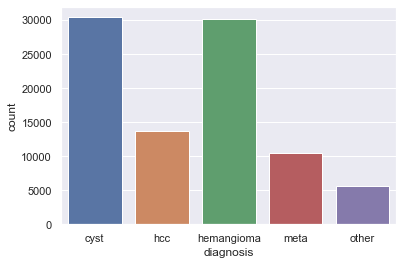

In [5]:
sns.countplot(data=df, x='diagnosis')

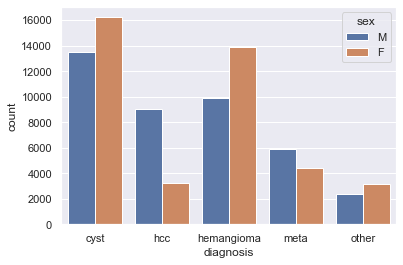

In [6]:
sns.countplot(data=df.query('sex == "M" or sex == "F"'), x='diagnosis', hue='sex')
plt.savefig('./fig/sex.pdf')

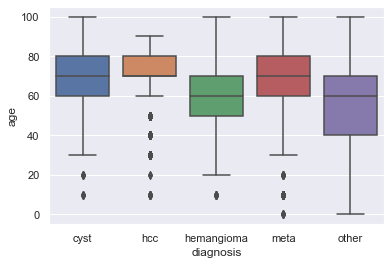

In [7]:
data = df[df['age'] != '']
data = data.query('sex == "M" or sex == "F"')
data['age'] = data['age'].astype('uint').sort_values()

sns.boxplot(x='diagnosis', y='age', data=data)
plt.savefig('./fig/age.pdf')

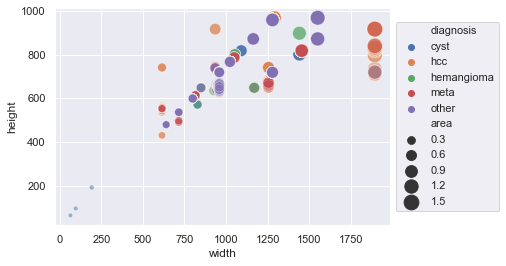

In [17]:
sns.scatterplot(
    data=df,
    x='width',
    y='height',
    hue='diagnosis',
    size='area',
    sizes=(20, 250),
    alpha=.5
)
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left')
plt.savefig('./fig/size.pdf')

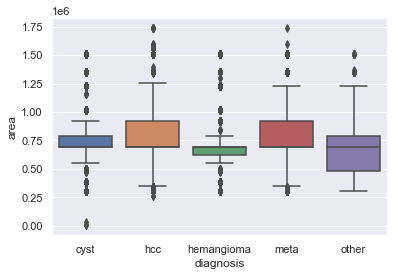

In [17]:
sns.boxplot(x='diagnosis', y='area', data=df)
plt.savefig('./fig/area.pdf')

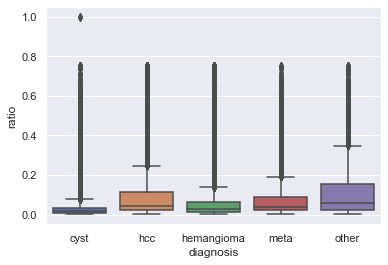

In [18]:
sns.boxplot(x='diagnosis', y='ratio', data=df)
plt.savefig('./fig/ratio_bbox.pdf')

In [ ]:
import cv2

cv2.imread(r'\\aka\work\hara.e\AMED\lib\dataset\DICOM\0170126000000097\CUTIMAGE\1276209320191028-001_1.2.840.113619.2.256.50122064820.1573093629.275.bmp')